In [1]:
import numpy as np
import os
import pandas as pd
from k_means import get_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from utils import euclidean_distance

In [2]:
data_path = 'datamining-2020/course1.csv'
submission_path = 'datamining-2020/SubmissionSample.csv'
result_path = 'datamining-2020/submission.csv'

In [3]:
data = pd.read_csv(data_path)
data = data.values
data = data[:, 1:]
print('data shape: ({}, {})'.format(data.shape[0], data.shape[1]))
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)  # use PCA to transform the data to 2-dimension just for visualization

data shape: (50000, 100)


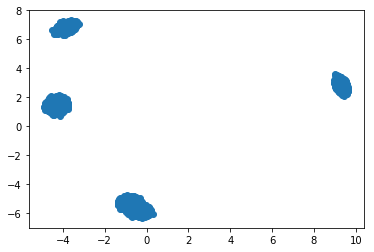

In [4]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

#### From the above scatter plot, we can know that the data should be easy to cluster

In [5]:
# define a func to get the radius of each cluster
def get_cluster_radius(centers, X, labels):
    n_samples, _ = X.shape
    n_clusters = centers.shape[0]
    distances_in_clusters = [[] for _ in range(n_clusters)]  # to record all distances in each cluster
    for i in range(n_samples):
        label = labels[i]
        eu_distance = euclidean_distance(X[i], centers[label])
        distances_in_clusters[label].append(eu_distance)
    radiuses = []
    for item in distances_in_clusters:
        radiuses.append(max(item))  # max distance to the center is the radius
    return radiuses

In [6]:
from k_means import KMeans
kmeans = KMeans(n_clusters=5, init='auto', n_init=5)  # this will run 5 times and get the best one
kmeans.fit(data)
radiuses = get_cluster_radius(kmeans.centers_, data, kmeans.labels_)
print('radiues: {}'.format(radiuses))
radiuses_sort = np.argsort(radiuses)  # ascending order
kmeans.centers_ = kmeans.centers_[radiuses_sort]
print('Sorated radiuses: {}'.format(np.array(radiuses)[radiuses_sort]))
labels = kmeans.predict(data)
print('The top 10 labels: {}'.format(labels[:10]))

Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
radiues: [2.2222046585771755, 2.15798310221043, 2.3568385310384676, 2.3561477196830936, 2.0422765625896857]
Sorated radiuses: [2.04227656 2.1579831  2.22220466 2.35614772 2.35683853]
The top 10 labels: [0 4 4 1 4 0 2 1 3 0]


### Because the initial cluster centers are selected well, the k-means coverges really fast. After ieration 1, it converged.

In [7]:
print(get_score(data, kmeans.centers_, labels))

86836.4647720182


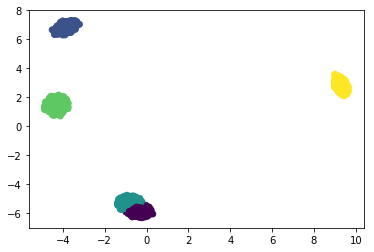

In [8]:
plt.scatter(data_pca[:,0],data_pca[:,1], c=labels)
plt.show()

In [9]:
# we use the sklearn.KMeans for comparing
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
centers_ = kmeans.cluster_centers_
labels_ = kmeans.labels_
radiuses = get_cluster_radius(centers_, data, labels_)
print('radiues: {}'.format(radiuses))
radiuses_sort = np.argsort(radiuses)  # ascending order
kmeans.cluster_centers_ = kmeans.cluster_centers_[radiuses_sort]
print('Sorated radiuses: {}'.format(np.array(radiuses)[radiuses_sort]))
labels_ = kmeans.predict(data)
print('The top 10 labels: {}'.format(labels_[:10]))
print(get_score(data, kmeans.cluster_centers_, labels_))
print(np.sum(labels == labels_))  

radiues: [2.0422765625896857, 2.15798310221043, 2.356838531038468, 2.2222046585771755, 2.356147719683093]
Sorated radiuses: [2.04227656 2.1579831  2.22220466 2.35614772 2.35683853]
The top 10 labels: [0 4 4 1 4 0 2 1 3 0]
86836.46477201821
50000


In [10]:
submission_csv = pd.read_csv(submission_path)
submission_csv['category'] = labels  # save the labels 
submission_csv.to_csv(result_path, index=None)

In [11]:
# use the gmm, in this dataset, it gets the same result with k-means
from gmm import GMM
gmm = GMM(n_components=5)
gmm.fit(data)
means_ = gmm.means_
labels_ = gmm.predict(data)
radiuses = get_cluster_radius(means_, data, labels_)
print('radiues: {}'.format(radiuses))
radiuses_sort = np.argsort(radiuses)  # ascending order
gmm.means_ = gmm.means_[radiuses_sort]
gmm.covariances_ = gmm.covariances_[radiuses_sort]
gmm.weights_ = gmm.weights_[radiuses_sort]
print('Sorated radiuses: {}'.format(np.array(radiuses)[radiuses_sort]))
labels_ = gmm.predict(data)
print('The top 10 labels: {}'.format(labels_[:10]))
print(get_score(data, gmm.means_, labels_)) 
print(sum(labels == labels_))

Converged at iteration 1: center shift 0.0 lower than tolerance 0.0001
radiues: [2.2222046585771777, 2.3568385310384707, 2.1579831022104243, 2.3561477196830984, 2.0422765625896866]
Sorated radiuses: [2.04227656 2.1579831  2.22220466 2.35614772 2.35683853]
The top 10 labels: [0 4 4 1 4 0 2 1 3 0]
86836.46477201827
50000
